### Visualisation de variables catégoriques

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df1 = pd.read_csv("source/IBM_HR_ATTRITION.csv")

In [4]:
df1

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [5]:
# La première ligne de donnée
df1.iloc[0]

Age                                      41
Attrition                               Yes
BusinessTravel                Travel_Rarely
DailyRate                              1102
Department                            Sales
DistanceFromHome                          1
Education                                 2
EducationField                Life Sciences
EmployeeCount                             1
EmployeeNumber                            1
EnvironmentSatisfaction                   2
Gender                               Female
HourlyRate                               94
JobInvolvement                            3
JobLevel                                  2
JobRole                     Sales Executive
JobSatisfaction                           4
MaritalStatus                        Single
MonthlyIncome                          5993
MonthlyRate                           19479
NumCompaniesWorked                        8
Over18                                    Y
OverTime                        

#### Première visualisation

On s'intéresse ici à la distribution des personnes qui ont quitté l’entreprise par rapport à leur _JobSatisfaction_.

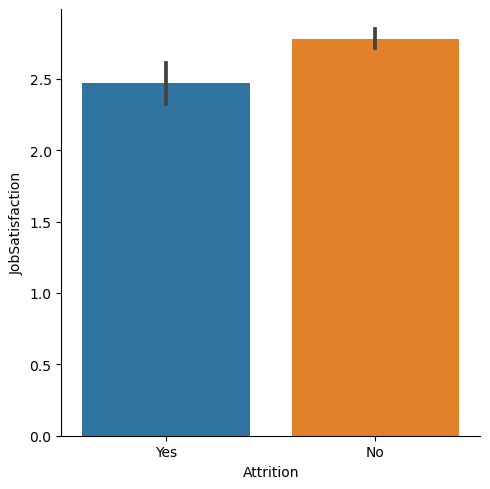

In [6]:
g1 = sns.catplot(x="Attrition", y="JobSatisfaction", data=df1, kind="bar")
plt.show()

##### Problème

Cette façon de présenter les données ne sert pas à grand chose. On ne voit pas grand chose d'intéressant.

#### Seconde visualisation

À l'aide d'une boxplot, on va visualiser la distribution avec le max, le min, la médiane et les valeurs aberrantes qui se représentées par des losanges en dehors des max/min.

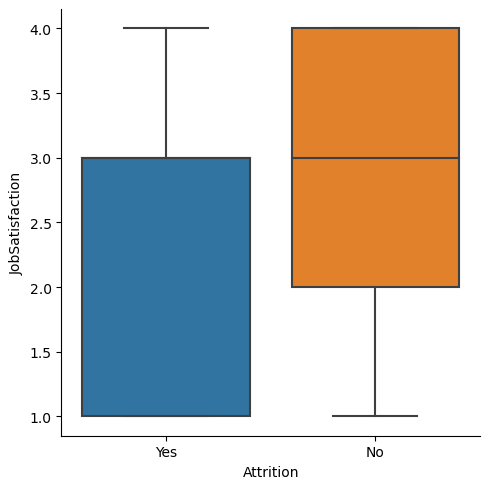

In [7]:
# Boxplot
g1 = sns.catplot(x="Attrition", y="JobSatisfaction", data=df1, kind="box")
plt.show()

##### Analyse

La lecture du graphique n'est pas si évidente au début. La médiane semble être à 3.0 pour ceux qui n'ont pas quitté l'entreprise mais on sait pas si elle est à 3 ou 1 pour ceux qui l'ont quitté. Intuitivement, on pourrait penser que cette médiane serait à 1 pour ceux qui ont quitté (pas contents de leur job = ils quittent plus facilement l'entreprise).

Autre curiosité, l'__absence de valeurs aberrantes__. Par exemple, on aurait pu penser que ceux qui quittent leur entreprise en étant très heureux de leur job soient très peu nombreux et constituent une valeur aberrantes. Mais ce n'est le cas et ils sont comptabilisés dans le max de leur catégorie.

Vérifions donc tout cela en manipulant les DataFrame:

In [8]:
df1[(df1["Attrition"] == "Yes")].describe().loc[:,["JobSatisfaction"]]

,JobSatisfaction
count,237.000000
mean,2.468354
std,1.118058
min,1.000000
25%,1.000000
50%,3.000000
75%,3.000000
max,4.000000


Ci-dessus, on a filtré la Dataframe sur tous ceux qui ont quitté l'entreprise et on en a sortie la description de la colonne JobSatisfaction pour ces données. On voit que la médiane (ligne 50%) est bien à _JobSatisfaction = 3_, que les min et max sont respectivement à 1 et 4. Ces données corespondent bien au graphique précédent.

In [9]:
df1[(df1["Attrition"] == "No")].describe()["JobSatisfaction"]

count    1233.000000
mean        2.778589
std         1.093277
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         4.000000
Name: JobSatisfaction, dtype: float64

Cette fois-ci, on a filtré sur les gens qui n'ont pas quitté l'entreprise, les données correspondent également au graphique.

On peut noter qu'en moyenne, les personnes qui n'ont pas quitté sont plus contentes de leur Job que celles qui l'ont quittée. La différence n'est pas énorme même si cette conclusion apparait comme intuitive.

In [10]:
# Nombre de personnes qui ont quitté leur job pour chacune des valeurs possibles de JobSatisfaction

df1[df1["Attrition"] == "Yes"].JobSatisfaction.value_counts()

3    73
1    66
4    52
2    46
Name: JobSatisfaction, dtype: int64

#### Visualisation de TotalWorkingYears

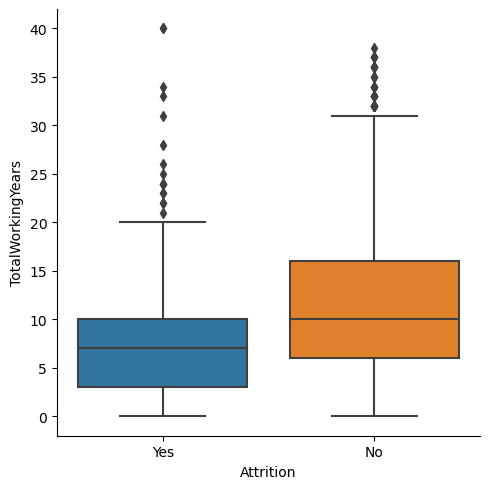

In [11]:
# Boxplot
g2 = sns.catplot(x="Attrition", y="TotalWorkingYears", data=df1, kind="box")
plt.show()

In [12]:
df1[(df1["Attrition"] == "Yes")].describe()["TotalWorkingYears"]

count    237.000000
mean       8.244726
std        7.169204
min        0.000000
25%        3.000000
50%        7.000000
75%       10.000000
max       40.000000
Name: TotalWorkingYears, dtype: float64

In [13]:
df1[(df1["Attrition"] == "No")].describe()["TotalWorkingYears"]

count    1233.000000
mean       11.862936
std         7.760719
min         0.000000
25%         6.000000
50%        10.000000
75%        16.000000
max        38.000000
Name: TotalWorkingYears, dtype: float64

In [14]:
df1[(df1["TotalWorkingYears"] == 20) & (df1["Attrition"] == "Yes")]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1006,49,Yes,Travel_Frequently,1475,Research & Development,28,2,Life Sciences,1,1420,...,1,80,0,20,2,3,4,3,1,3
1461,50,Yes,Travel_Rarely,410,Sales,28,3,Marketing,1,2055,...,2,80,1,20,3,3,3,2,2,0


On voit ici des valeurs aberrantes grâce au boxplot. Les 2 traits horizontaux en haut et en bas sont les valeurs min et max calculées. Ce qui veut dire que les valeurs dépassant ces limites (les losanges qui traînent en haut dans cet exemple) peuvent être reconnues comme aberrantes.

#### Remplacer les valeurs de la colonne Attrition par 1 pour Yes et 0 pour No

In [15]:
df1.loc[df1['Attrition'] == "Yes", 'Attrition'] = 1
df1.loc[df1['Attrition'] == "No", 'Attrition'] = 0
df1.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


#### Utilisation des histogrammes pour une variable catégorique

/home/stagiaire/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


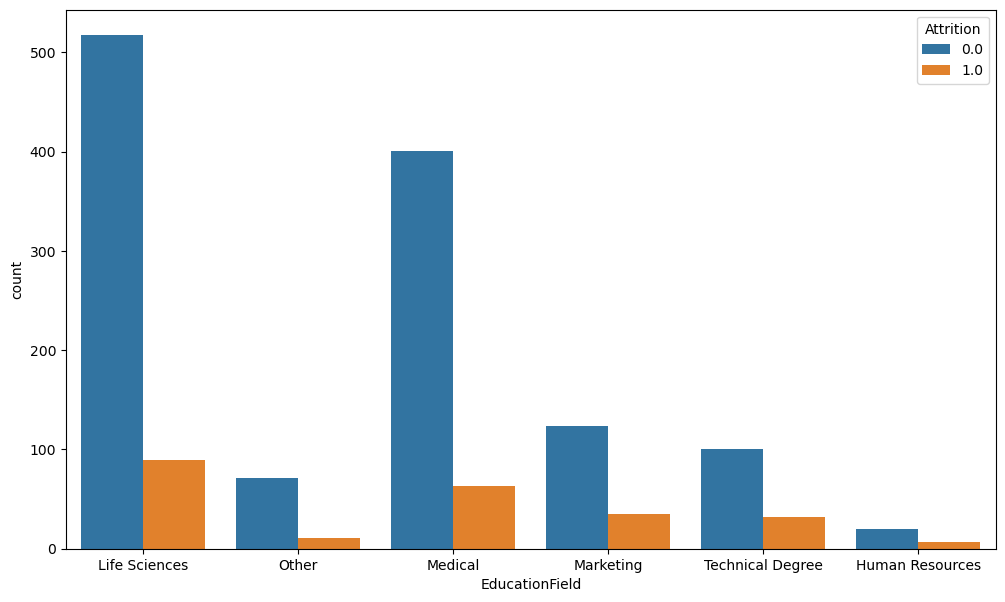

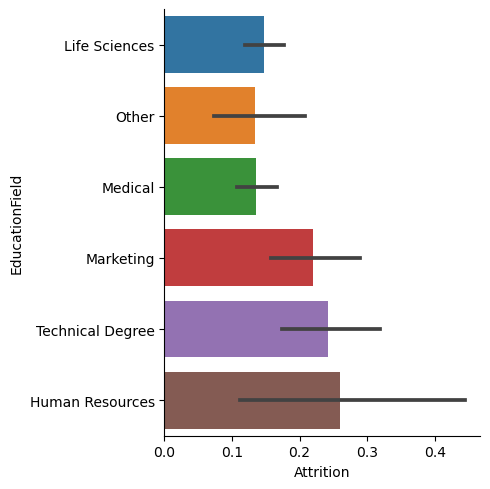

In [36]:
plt.figure(figsize=(12,7))
sns.countplot(df1.EducationField, hue=df1.Attrition)
sns.catplot(x="Attrition", y="EducationField", data=df1, kind="bar")
plt.show()

In [28]:
help(sns.catplot)

Help on function catplot in module seaborn.categorical:

catplot(*, x=None, y=None, hue=None, data=None, row=None, col=None, col_wrap=None, estimator=<function mean at 0x7f927416d8b0>, ci=95, n_boot=1000, units=None, seed=None, order=None, hue_order=None, row_order=None, col_order=None, kind='strip', height=5, aspect=1, orient=None, color=None, palette=None, legend=True, legend_out=True, sharex=True, sharey=True, margin_titles=False, facet_kws=None, **kwargs)
    Figure-level interface for drawing categorical plots onto a FacetGrid.
    
    This function provides access to several axes-level functions that
    show the relationship between a numerical and one or more categorical
    variables using one of several visual representations. The ``kind``
    parameter selects the underlying axes-level function to use:
    
    Categorical scatterplots:
    
    - :func:`stripplot` (with ``kind="strip"``; the default)
    - :func:`swarmplot` (with ``kind="swarm"``)
    
    Categorical dist

### Visualisation d'une distribution

In [17]:
df1.describe()["MonthlyIncome"]

count     1470.000000
mean      6502.931293
std       4707.956783
min       1009.000000
25%       2911.000000
50%       4919.000000
75%       8379.000000
max      19999.000000
Name: MonthlyIncome, dtype: float64

/home/stagiaire/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


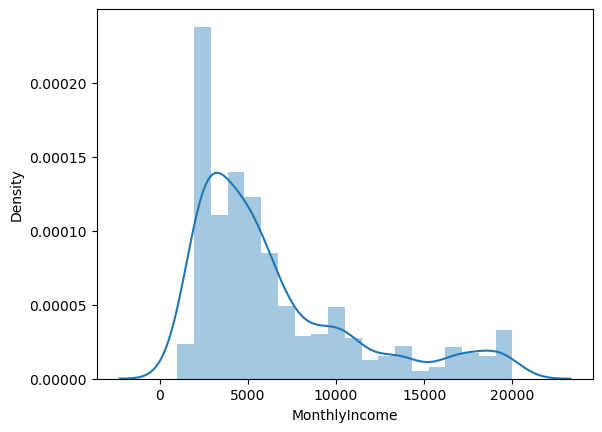

In [18]:
sns.distplot(df1["MonthlyIncome"])
plt.show()

/home/stagiaire/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


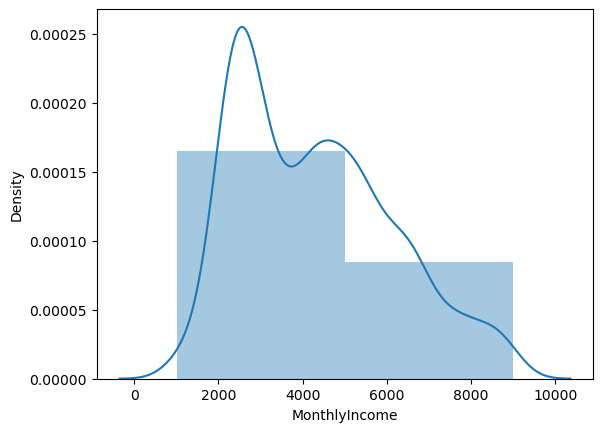

In [19]:
df2 = df1[df1["MonthlyIncome"] <= 9000]
sns.distplot(df2["MonthlyIncome"], bins = 2)
plt.show()

/home/stagiaire/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


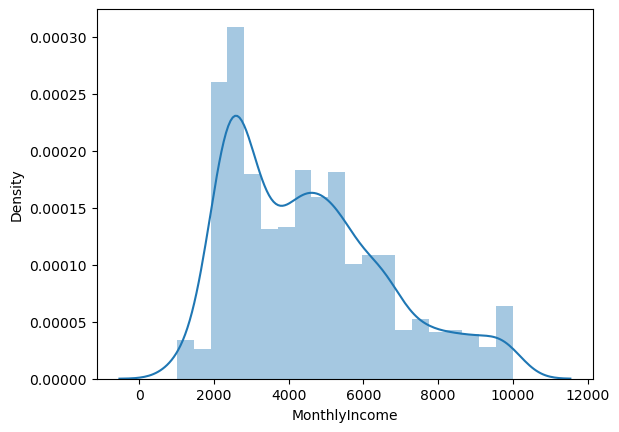

In [20]:
df2 = df1[df1["MonthlyIncome"] <= 10000]
sns.distplot(df2["MonthlyIncome"], bins = 20)
plt.show()

### Visualisation d'une relation linéaire



In [21]:
with pd.option_context('display.max_rows', 5, 'display.max_columns', None):
    print(df1)

      Age Attrition     BusinessTravel  DailyRate              Department  \
0      41         1      Travel_Rarely       1102                   Sales   
1      49         0  Travel_Frequently        279  Research & Development   
...   ...       ...                ...        ...                     ...   
1468   49         0  Travel_Frequently       1023                   Sales   
1469   34         0      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeCount  \
0                    1          2  Life Sciences              1   
1                    8          1  Life Sciences              1   
...                ...        ...            ...            ...   
1468                 2          3        Medical              1   
1469                 8          3        Medical              1   

      EmployeeNumber  EnvironmentSatisfaction  Gender  HourlyRate  \
0                  1                        2  Female          94

Il faut changer le type en float et changer le dtype en float64 pour que le lmplot fonctionne correctement.

PAS COMPRIS POURQUOI, MAIS MERCI LMPLOT

In [22]:
df1.loc[df1['Attrition'] == 1, 'Attrition'] = 1.0
df1.loc[df1['Attrition'] == 0, 'Attrition'] = 0.0

In [23]:
df1.DistanceFromHome.isna()

0       False
1       False
2       False
3       False
4       False
        ...  
1465    False
1466    False
1467    False
1468    False
1469    False
Name: DistanceFromHome, Length: 1470, dtype: bool

In [24]:
df1 = df1.astype({'Attrition': 'float64'})

In [25]:
df1.dtypes

Age                           int64
Attrition                   float64
BusinessTravel               object
DailyRate                     int64
Department                   object
DistanceFromHome              int64
Education                     int64
EducationField               object
EmployeeCount                 int64
EmployeeNumber                int64
EnvironmentSatisfaction       int64
Gender                       object
HourlyRate                    int64
JobInvolvement                int64
JobLevel                      int64
JobRole                      object
JobSatisfaction               int64
MaritalStatus                object
MonthlyIncome                 int64
MonthlyRate                   int64
NumCompaniesWorked            int64
Over18                       object
OverTime                     object
PercentSalaryHike             int64
PerformanceRating             int64
RelationshipSatisfaction      int64
StandardHours                 int64
StockOptionLevel            

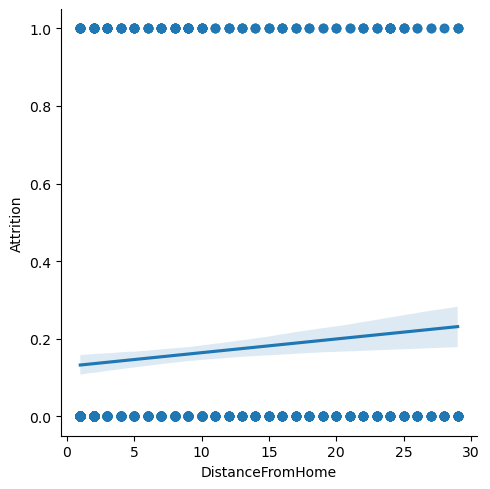

In [26]:
sns.lmplot(x="DistanceFromHome", y="Attrition", data=df1)
plt.show()

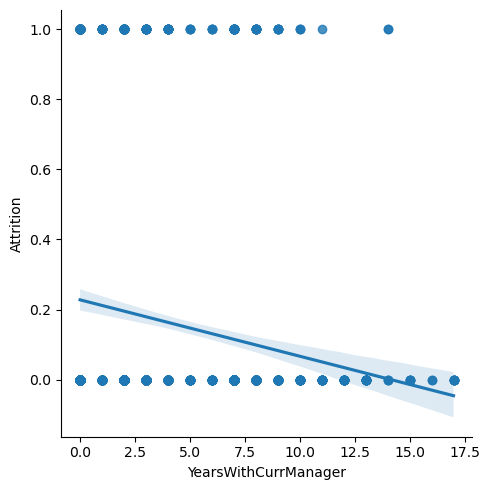

In [27]:
sns.lmplot(x="YearsWithCurrManager", y="Attrition", data=df1)
plt.show()